# Sampling and Law of Large Numbers
### Stephen Elston
### Data Science 410

## Introduction

Sampling is a fundamental process in the collection of data. Sampling is important because we can almost never look at the whole population. Some key points to keep in mind about sampling are:
- An understanding of sampling is essential to ensure that analysis performed are representative of the entire population. 
- You will use inferences on the sample to say something about the population.
- You will need estimates of variances on the sample calculations to say something about the population.

Let's look at some examples of sampling.

| Use Case | Sample | Population |
|---|---|---|
| A/B Testing | The users we show either web sites A or B | All possible users, past present and future|
|World Cup Soccer | 32 teams which qualify in one season | All national teams in past, present and future years|
|Average height of data science students | Students in UW Data Science Program | All students taking data science classes world wide|

Notice, that in several cases it is not only impractical, but impossible to collect data from the entire population. Hence, we we nearly always work with samples, rather than the entire population. 

### Importance of Sampling   

All statistical methods rely on the use of **randomized unbiased samples**. Failure to use such samples violates many of the key assumptions of statistical models. Thus, an understanding of the proper use of sampling methods is essential to performing statistical inference.     

## Sampling Strategies

There are a great number of possible sampling methods. In this lesson, we will focus on the most commonly used methods. At the conclusion of this lesson, you should be able to apply these sampling strategies: 

- Bernoulli Sampling
- Stratified Sampling
- Cluster Sampling
- Systematic Sampling

### Bernoulli Sampling

Bernoulli sampling has the following properties:

- A **simple random sample** is created. 
- A particular value is selected based on the outcome of a Bernoulli trial.
- The sample has a **fixed and predetermined size**. In other words, the probability of a value being selected in the Bernoulli trial is a fixed value, $p$.

If you want to ensure the quality of a packaging process, you would not want to weight the contents of every package. Instead, randomly sample packages and measure the weight of product inside. 

Let's look at an example. The code in the cell below creates a data frame with 200 random samples from a standard Normal distribution, generated with [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). These samples are randomly divided into 4 groups using [numpy.random.choice](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html). Notice that the probability of a sample being in one of the groups sums to 1.0.  

Run this code and examine the summary of the sample. 

In [1]:
import numpy.random as nr
import pandas as pd
nr.seed(345)
population_size = 2000
data = pd.DataFrame({"var":nr.normal(size = population_size), 
                     "group":nr.choice(range(4), size= population_size, p = [0.1,0.3,0.4,0.2])})
data.head(10)

,var,group
0,1.469248,1
1,-1.150144,2
2,2.519226,3
3,-0.082478,3
4,-0.033601,1
5,-1.636656,2
6,-0.412092,2
7,1.784949,2
8,0.042383,1
9,-0.619732,3


We know that our population of 200 values was sampled from standard Normal distribution. Therefore, the mean of each group should be close to 0.0. Let's find out. Execute the code in the cell below to compute the mean of each group and examine the results. 

In [2]:
def count_mean(dat):
    import numpy as np
    import pandas as pd
    groups = dat.groupby('group') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'var']})
count_mean(data)

,count,mean
group,,
0,200,-0.004609
1,619,-0.033427
2,812,-0.020730
3,369,-0.011268


Next, Bernoulli sample one tenth of these data by running the code in the cell below.  

In [3]:
p = 0.1
bernoulli = data.iloc[nr.choice(range(population_size), size = int(p * population_size)), :]
count_mean(bernoulli)

,count,mean
group,,
0,15,-0.222466
1,65,0.007755
2,87,-0.014650
3,33,0.030989


You can see that the total number of samples is approximately 10%. Further, you can see that some of the mean estimates are further from zero.   

**Your Turn:** You can also use the [numpy.random.choice](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html) method to Bernoulli sample a data frame. Create the code to Bernoulli sample 20 cases from the population and print the summary statistics of number of members and mean by group. 

Examine these results. Do the numbers of samples appear representative of the population? 

Notice in both cases you have tried, that for both samples the number of cases for some groups can be rather small. Compare the means by groups of the two samples and the population, and notice how much variation there is. Clearly, Bernoulli sampling is far from idea if the data have some kind of structure, such as into groups.  

### Stratified Sampling

Stratified sampling strategies are used when data are organized in groups or **strata**. The idea is simple: sample each group in such a way that the sample includes an equal number of cases from each group. The simplest version of stratified sampling creates an **equal-size Bernoulli sample** from each strata.

Some examples of stratified sampling include:

- Sample equal numbers of men and women.
- Sample equal numbers of people in different income categories.
- Sample the same number of people from towns of different sizes or zip codes with different populations.

In many cases, you may need to create nested samples. For example, a top level sample can be people by zip code, a geographic strata. Within each zip code, people are then sampled by income bracket strata. 

The code in the cell below samples our population uniformly, by group. The mean is then computed for each group. Execute this code and examine the result. The comments can help you understand the code. 

In [4]:
p = 0.1
def stratify(dat, p):
    groups = dat.groupby('group') # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: 
        ## If sufficient group size, sample each group drop the uneeded index level
        ## and return. This leaves a data frame with just the original row index. 
        return groups.apply(lambda x: x.sample(n=num)).droplevel('group')
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))
stratified = stratify(data, p)
count_mean(stratified)

,count,mean
group,,
0,200,-0.004609
1,200,-0.121161
2,200,-0.114936
3,200,-0.047649


We now have 200 samples from each strata. Notice that the mean estimates of each group are closer those for the population. Stratified sampling ensures the samples for each group are more  representative of the groups. 

### Cluster Sampling

When sampling is expensive a strategy is required to reduce the cost, yet still keep randomized sampling. Some examples of data which is expensive to collect includes:

- Surveys of customers at a chain of stores.
- Door to door survey of homeowners.

In these cases, the population can be divided into clusters and a random selection of clusters sampled. The process of cluster sampling follows these steps:

- Define the clusters for the population.
- Randomly select some clusters.
- Sample from the selected clusters.
- Optionally, stratify the sample from within each cluster.

As an example, you can select a few store locations and Bernoulli sample customers at these locations.

The code in the cell bellow divides a population into clusters, randomly selects 3 clusters and computes and prints some summary statistics. Run this code and examine the results.

In [5]:
## First compute the clusters
num_clusters = 10
num_vals = 200
## Create a data frame with randomly sampled cluster numbers
clusters = pd.DataFrame({'group': range(num_clusters)}).sample(n = num_vals, replace = True)
## Add a column to the data frame with Normally distributed values
clusters.loc[:, 'var'] = nr.normal(size = num_vals)
clusters.head(10) # Print the head to get a feel for these data

,group,var
0,0,-0.368166
7,7,-1.723087
7,7,0.662346
8,8,1.597584
4,4,-2.344152
2,2,1.164256
7,7,-1.420746
8,8,1.453863
2,2,-2.632312
4,4,0.324487


So that we have a basis of compairison, we will compute the count and mean of each group in our population. 

In [6]:
count_mean(clusters)

,count,mean
group,,
0,21,-0.417774
1,24,0.316305
2,20,-0.011409
3,19,-0.048794
4,27,-0.237794
5,13,-0.069396
6,17,-0.096909
7,17,-0.266625
8,26,-0.078829


Examine these results. Notice that the number of samples in each group is similar, but not the same. Further, the means are close to, but never exactly, zero. 

Next we randomly sample 3 of the clusters. 

In [7]:
## Randomly sample the group numbers, making sure we sample from 
## unique values of the group numbers. 
clusters_samples = nr.choice(clusters.loc[:, 'group'].unique(), 
                             size = 3, replace = False)
## Now sample all rows with the selected cluster numbers
clus_samples = clusters.loc[clusters.loc[:, 'group'].isin(clusters_samples), :]
print('cluster sampled are: ')
[print(x) for x in clusters_samples] 
clus_samples.head(10)

cluster sampled are: 
7
3
9


,group,var
7,7,-1.723087
7,7,0.662346
7,7,-1.420746
9,9,1.197124
7,7,0.128963
9,9,1.495541
3,3,-2.077893
7,7,-0.033938
3,3,-0.431927
3,3,0.538705


You can see that  3 clusters have been selected.

Recalling that the population contains clusters, we treat these clusters like the groups we worked with previously. Execute the code in the cell below and examine the results. 

In [8]:
count_mean(clus_samples)

,count,mean
group,,
3,19,-0.048794
7,17,-0.266625
9,16,0.058538


**Your Turn:** In many cases, cluster sampling is often combined with random sampling to reduce the size of the sub-samples. Reducing the sample sizes can be important if the clusters are large or if the collection of data is expensive. 

Create a stratified sample of the three clusters with `p = 0.1` can then compute and display the count of the samples and the mean using the `count_mean` function. 

Examine the results. Are these samples reasonably representative of the full cluster samples and why. 

### Systematic Sampling

**WARNING: systematic sampling is a form of convenience sampling. Convenience sampling inevitably leads to incorrect inferences!**

A commonly sited example of convenience sampling is known as **database sampling**. In database sample the first N rows resulting from a query are used for an analysis. There is no reason to believe that such a sample is representative of a population in any way. 

In **systematic sampling** every k-th case of the population is selected. As you can imagine, this approach is not a random sampling method, but rather a case of convenience sampling. 

The code in the cell bellow systematically samples the population by simply taking every 5th value as a sample. Run this code and examine the results. 

In [9]:
## Systematic sampling every kth item.
k = 5
sys_sample = data.iloc[range(0, data.shape[0], k), :]
sys_sample.head(10)

,var,group
0,1.469248,1
5,-1.636656,2
10,-0.991691,2
15,0.379893,2
20,0.259025,3
25,-0.456396,3
30,-0.538969,2
35,0.175477,2
40,0.364391,2
45,-0.561430,2


Next, compute the number of samples and the means of each group based on these samples. Execute the code in the cell below and examine the results.

In [10]:
count_mean(sys_sample)

,count,mean
group,,
0,33,-0.042917
1,122,-0.026899
2,166,0.091641
3,79,-0.007695


Notice the differing sizes of the sample in each group and the bias in the mean estimates. This illustrates the hazards of convenience sampling. 

## A few more thoughts on sampling

- Random sampling is essential to the underlying assumptions of statistical inference. 
- Whenever you are planing to sample data, make sure you have a clear sampling plan. 
- Know the number of clusters, strata, samples in advance.
- Don’t stop sampling when desired result is achieved: e.g. error measure! 
- Done properly, controls for database effects, like indexing. 


## Sampling and the law of large numbers

The **law of large numbers** is a theorem that states that **statistics of independent samples converge to the population values as more unbiased experiments are performed**. We can write this mathematically for the **expected value** of the mean as:

$$Let\ \bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i\\
then\ by\ the\ law\ of\ Large\ Numbers\\
\bar{X} \rightarrow E(X) = \mu\\
as\\
n \rightarrow \infty$$

The law of large numbers is foundational to statistics. We rely on the law of large numbers whenever we work with samples of data. We can rest assured that **larger samples are more representatives of the population we are sampling**. This theorem is the foundation of not only sampling theory, but modern compuation methods including, simulation, bootstrap resampling, and Monte Carlo methods. If the real world did not follow this theorem much of statistics, to say nothing of science and technology would fail badly. 

Given this great importance, it should not be surprising that the law of large numbers has a long history. Jacob Bernoulli postumously published the first proof for the Binomial distribution in 1713. In fact the law of large numbers is sometimes referred to as **Bernoulli's theorm**. A more general proof was published by Poisson in 1837.

Let's think about a simple example. The mean of 50 coin flips (0,1)=(T,H) is usually farther away from the true mean of 0.5 than 5,000 coin flips. The code in the cell below computes and then samples a population of 1,000,000 Bernoulli trials with $p=0.5$. Run this code and  examine the results. Does the expected value, or mean converge to 0.5 as `n` increases?

In [11]:
nr.seed(3457)
n = 1
p = 0.5
size = 1000000
# Create a large binomial distributed populatiion. 
pop = pd.DataFrame({'var':nr.binomial(n, p, size)}) 
# Sample the population for different sizes and compute the mean
sample_size = [5, 50, 500, 5000]
out = [pop.sample(n = x).mean(axis = 0) for x in sample_size] 
for n,x in zip(sample_size,out): print("%.0f  %.2f" %(n, x))

5  0.80
50  0.36
500  0.48
5000  0.49


### Convergance of Bernolli trials 

Next, let's use the series of Bernuoulli trials to examine the convergance of the estimated probability, $p$, for a number of flips of a fair coin. This series should converge to $p = 0.5$ as the number of samples increses. The code in the cell below computes the running mean of the realizations of a series of Bernoulli trials as the sample size increases. Run this code and examine the results. 

In [12]:
# Calculate and plot a running average of N-trials of flipping a fair coin
import numpy as np
num_samps = 5000
running_average = pd.DataFrame({'num_samples': range(1, num_samps), 
                                'mean':np.concatenate([np.mean(pop.sample(n = x)) for x in range(1, num_samps)]).ravel().tolist()}) 

Now, run the code in the cell below to plot $p$ for the different sample sizes. Do the results appear to be converging to $p$ as $n \rightarrow \infty$?

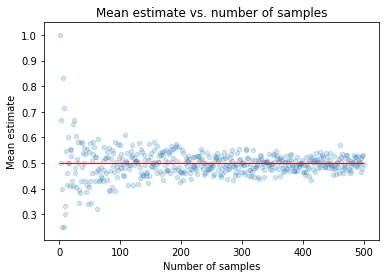

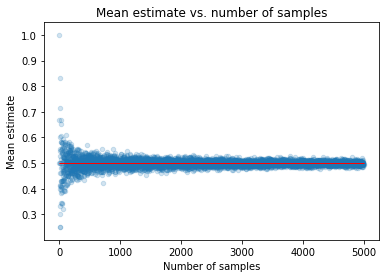

In [31]:
%matplotlib inline
def plot_samples(df, num_plot, p):
    import matplotlib.pyplot as plt
    running_average.iloc[:num_plot, :].plot.scatter(x = 'num_samples', y = 'mean', alpha = 0.2, style="o")
    plt.hlines(p, 0, num_plot, color='red', linewidths=1.0) 
    plt.ylabel('Mean estimate')
    plt.xlabel('Number of samples')
    plt.title('Mean estimate vs. number of samples')    
plot_samples(running_average, 500, p)
plot_samples(running_average, 5000, p)

### Convergance for a Normal Distribution

As we sample from a Normal distribution, the mean of the sample will converge to the population mean and the sample standard deviation will converge to the population standard deviation. From the law of large numbers, the **standard error** of the sample mean will converge as:

$$se = \frac{sd}{\sqrt{(n)}}$$

The code in the cell below computes the mean and standard error of the mean estimate for 10 to 10,000 samples of a Normal distribution. Execute this code.

In [14]:
## Plot means and SE for 10000 Normal distributions
import math
start = 10
end = 10000
step = 10
norms = pd.DataFrame({'num_samples':range(start, end, step),
                      'mean': [np.mean(nr.normal(size = x)) for x in range(start, end, step)],
                       'se_up':[1/math.sqrt(n) for n in range(start, end, step)],
                       'se_dn':[-1/math.sqrt(n) for n in range(start, end, step)]})

Run the code in the cell below to plot the convergance of the sample mean as the number of samples increases.

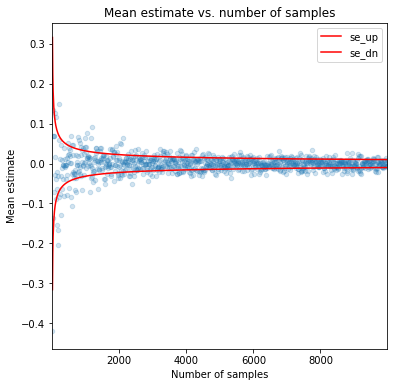

In [15]:
def plot_se(df):
    import matplotlib.pyplot as plt
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    norms.plot.scatter(x = 'num_samples', y = 'mean', alpha = 0.2, style="o", ax = ax)
    norms.plot(x = 'num_samples', y = 'se_up', c = 'red', ax = ax) 
    norms.plot(x = 'num_samples', y = 'se_dn', c = 'red', ax = ax) 
    ax.set_ylabel('Mean estimate')
    ax.set_xlabel('Number of samples')
    ax.set_title('Mean estimate vs. number of samples')
plot_se(norms)    

Does this plot show convergance to the population mean as you would expect from the law of large numbers?

**Your Turn:** In the cell below create and exectue code to plot the convergance of the sample standard deviation. Include lines showing the expected bounds on the standard error. 

Examine this result. Does the estiamte of the standard deviation appear to converge as expected as the number of samples increase? 

## Summary

In the lesson you have explored the concepts of sampling and how sampling relates to the law of large numbers. Nearly all data we work with as data scientists is sampled from larger populations. It is therefore important to have an understanding of sampling methods and the convergance of statistical estimates. 

Specifically in this lesson you have done the following:
- Used Bernoulli sampling to generate randomized samples of a population.
- Applied stratified sampling to populations with unequal numbers of members. 
- Used cluster sampling to reduce the number of samples required for cases where data collection is expensive.
- Estimated sample statistics converge to the population statistics as the sample size grows. This convergence is referred to as *The Law of Large Numbers*. 

#### Copyright 2019, 2020, Stephen F Elston. All rights reserved.